In [1]:
import numpy as np
from scipy.optimize import minimize

In [2]:
def sigmoid(inputs):
  output = 1 / (1 + np.exp(-inputs))
  return output

def sigmoid1(inputs):                                                           # first derivative of sigmoid
  temp1 =  sigmoid(inputs)
  temp2 = temp1*(1-temp1)
  return temp2

def sigmoid2(inputs):                                                           # Second derivative of sigmoid
  temp1 =  sigmoid(inputs)
  temp2 = temp1*(1-temp1)*(1-2*temp1)
  return temp2

def sigmoid3(inputs):                                                           # Third derivative of sigmoid
  temp1 =  sigmoid(inputs)
  temp2 = temp1*(1-temp1)*(1-6*temp1+6*(temp1**2))
  return temp2


In [3]:
def sigmoid_for_k(input,k):
  if k ==0:
    return sigmoid(input)
  elif k == 1:
    return sigmoid1(input)
  elif k ==2:
    return sigmoid2(input)
  elif k == 3:
    return sigmoid3(input)

In [4]:
def layer1NN(p,inputs):                                # Neural Network with 1 hidden unit
  # inputs.resize((len(inputs),1))
  weights = p[0:(len(p)//3)].reshape(1,len(p)//3)
  biases = p[(len(p)//3):2*(len(p)//3)].reshape(1,len(p)//3)
  nweights = p[2*(len(p)//3):3*(len(p)//3)].reshape(len(p)//3)

  lin_out = weights.T * inputs + biases.T                                        # output shape(n_neurons, input_size )
  nor_out = sigmoid(lin_out)
  net_out = nweights @ nor_out                                                  # output shape(1, input_size )
  # print(nweights.shape,nor_out.shape)
  return lin_out, net_out

In [5]:
def der_NN_xj_k(p,inputs,k=0):
  # X = (x_1,x_2)
  # j = derivative w.r.t x_1 or x_2
  # k = kth derivative w.r.t x_j

  weights = p[0:(len(p)//3)].reshape(1,len(p)//3)
  biases = p[(len(p)//3):2*(len(p)//3)].reshape(1,len(p)//3)
  nweights = p[2*(len(p)//3):3*(len(p)//3)].reshape(len(p)//3)

  temp1 = weights**k
  temp2 = nweights * temp1                                                      # (1,n_neurons)
  lin_out = weights.T * inputs + biases.T

  temp3 = sigmoid_for_k(lin_out,k)
  temp4 = temp2 @ temp3
  # print(temp4.shape)
  return temp4


def der_NN_xj_k_for_v(inputs, weights, nweights, biases, j=0,k=0):              # This calculates D_Ng/D_v
  # X = (x_1,x_2)
  # j = derivative w.r.t x_1 or x_2
  # k = kth derivative w.r.t x_j
  lin_out = weights.T * inputs + biases.T
  # lin_out = weights @ inputs + biases
  temp1 = ((weights**k) * (sigmoid_for_k(lin_out,k).T) )
  return temp1                                                                  # return (n,n_neurons) shape array

def der_NN_xj_k_for_u(inputs, weights, nweights, biases, j=0,k=0):              # This calculates D_Ng/D_u
  # X = (x_1,x_2)
  # j = derivative w.r.t x_1 or x_2
  # k = kth derivative w.r.t x_j
  lin_out = weights.T * inputs + biases.T
  # lin_out = weights @ inputs + biases
  temp1 = weights**k
  temp2 = nweights * temp1
  # temp2.reshape(weights[j].shape)
  temp3 = (sigmoid_for_k(lin_out,k+1).T * temp2)
  return temp3                                                                  # return (n,n_neurons) shape array

def der_NN_xj_k_for_w(inputs, weights, nweights, biases, j=0,k=0):              # This calculates D_Ng/D_w


  x = inputs


  lin_out = weights.T * inputs + biases.T


  temp1 = ((nweights*(weights**k)) * (sigmoid_for_k(lin_out,k+1).T) )
  temp2 = x
  temp3 = temp2 * (temp1.T)
  temp3 = temp3.T

  if k >0:
    temp4 = k*((nweights*(weights**(k-1))) * (sigmoid_for_k(lin_out,k).T) )
    return temp3 + temp4

  return temp3

In [6]:
inputs = np.linspace(0,2,10)


n_inputs = 1
n_neurons =10

p3 = np.random.randn(1,3*n_neurons)
# p = np.ones((1,3*n_neurons))
p3 =p3[0]

In [7]:
def grad3(p,inputs):                                # Neural Network with 1 hidden unit
  # inputs.resize((len(inputs),1))
  weights = p[0:(len(p)//3)].reshape(1,len(p)//3)
  biases = p[(len(p)//3):2*(len(p)//3)].reshape(1,len(p)//3)
  nweights = p[2*(len(p)//3):3*(len(p)//3)].reshape(len(p)//3)

  output = weights.T * inputs + biases.T

  sig = sigmoid(output)
  sig1 = sigmoid1(output)
  sig2 = sigmoid2(output)
  sig3 = sigmoid3(output)

  a = -2 + (1-2*inputs)/5 + (inputs-inputs**2)
  b = (2 - 4*inputs) + (inputs - inputs**2)/5
  c = (inputs - inputs**2)
  d = (np.sin(1)*np.exp(-1/5))/5 + (inputs*np.sin(1)*np.exp(-1/5)) + (np.exp(-inputs/5)*np.cos(inputs))/5


  D2N_DX2_V = der_NN_xj_k_for_v(inputs, weights, nweights, biases, j=0,k=2)
  DN_DX_V = der_NN_xj_k_for_v(inputs, weights, nweights, biases, j=0,k=1)
  DN_V = der_NN_xj_k_for_v(inputs, weights, nweights, biases, j=0,k=0)
  err_for_T_V = a*DN_V.T + b*DN_DX_V.T + c*D2N_DX2_V.T

  D2N_DX2_U = der_NN_xj_k_for_u(inputs, weights, nweights, biases, j=0,k=2)
  DN_DX_U = der_NN_xj_k_for_u(inputs, weights, nweights, biases, j=0,k=1)
  DN_U = der_NN_xj_k_for_u(inputs, weights, nweights, biases, j=0,k=0)
  err_for_T_U = a*DN_U.T + b*DN_DX_U.T + c*D2N_DX2_U.T

  D2N_DX2_W = der_NN_xj_k_for_w(inputs, weights, nweights, biases, j=0,k=2)
  DN_DX_W = der_NN_xj_k_for_w(inputs, weights, nweights, biases, j=0,k=1)
  DN_W = der_NN_xj_k_for_w(inputs, weights, nweights, biases, j=0,k=0)

  err_for_T_W = a*DN_W.T + b*DN_DX_W.T + c*D2N_DX2_W.T



  _, N = layer1NN(p,inputs)
  DN = der_NN_xj_k(p,inputs ,k=1)
  DN2 = der_NN_xj_k(p,inputs ,k=2)
  err = (a*N + b*DN + c*DN2 + d)



  DW = err @ err_for_T_W.T
  DU = err @ err_for_T_U.T
  DV = err @ err_for_T_V.T


  dp = np.array([DW,DU,DV])
  dp = dp.reshape(1,len(p))

  return dp[0]

In [8]:
def error3(p,inputs):
  # x.resize((len(inputs),1))
  a = -2 + (1-2*inputs)/5 + (inputs-inputs**2)
  b = (2 - 4*inputs) + (inputs - inputs**2)/5
  c = (inputs - inputs**2)
  d = (np.sin(1)*np.exp(-1/5))/5 + (inputs*np.sin(1)*np.exp(-1/5)) + (np.exp(-inputs/5)*np.cos(inputs))/5

  _, N = layer1NN(p,inputs)
  DN = der_NN_xj_k(p,inputs ,k=1)
  DN2 = der_NN_xj_k(p,inputs ,k=2)
  temp1 = (a*N + b*DN + c*DN2 + d)
  return temp1@temp1.T

In [9]:
error3(p3,inputs)

array([[5.26687038]])

In [10]:
res3 = minimize(error3,p3, method='nelder-mead',args=(inputs), options={'xatol': 1e-14, 'disp': True})

<ipython-input-10-b34960b5c483>:1: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  res3 = minimize(error3,p3, method='nelder-mead',args=(inputs), options={'xatol': 1e-14, 'disp': True})


In [11]:
error3(res3.x,inputs)

array([[1.12366684e-06]])

In [12]:
def my_function3(x):
    temp1 = np.exp(-x / 5)
    temp2 = np.sin(x)


    result = temp1*temp2
    return result

In [13]:
x_test = np.linspace(0,2,100)


_, N = layer1NN(res3.x,x_test)
yt = x_test*np.sin(1)*np.exp(-1/5)  + (x_test - x_test**2)*N
ya = my_function3(x_test)

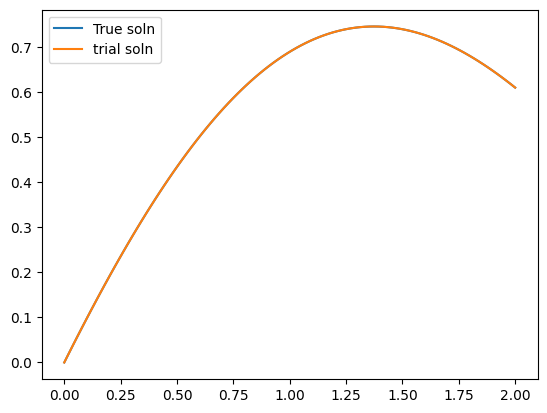

In [14]:
import matplotlib.pyplot as plt
plt.plot(x_test,( ya),label = 'True soln')
plt.plot(x_test,( (yt).reshape(100,1)),label = 'trial soln')
plt.legend()

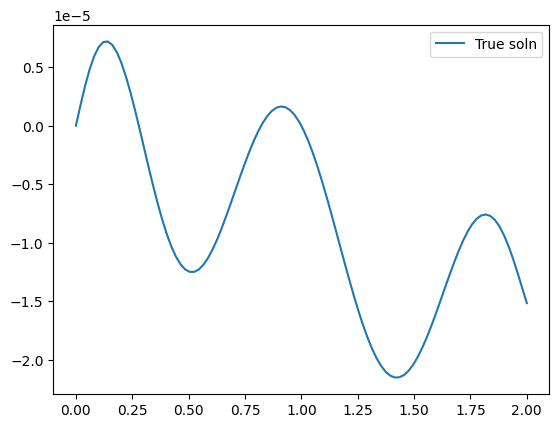

In [15]:
import matplotlib.pyplot as plt
plt.plot(x_test,( ya-yt),label = 'True soln')
# plt.plot(x_test,( (yt).reshape(100,1)),label = 'trial soln')
plt.legend()

In [16]:
res3 = minimize(error3,p3, method='BFGS', jac=grad3,args=(inputs), options={ 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 40
         Function evaluations: 45
         Gradient evaluations: 45


In [17]:
error3(res3.x,inputs)

array([[1.46505133e-06]])

In [18]:
x_test = np.linspace(0,2,100)


_, N = layer1NN(res3.x,x_test)
yt = x_test*np.sin(1)*np.exp(-1/5)  + (x_test - x_test**2)*N
ya = my_function3(x_test)

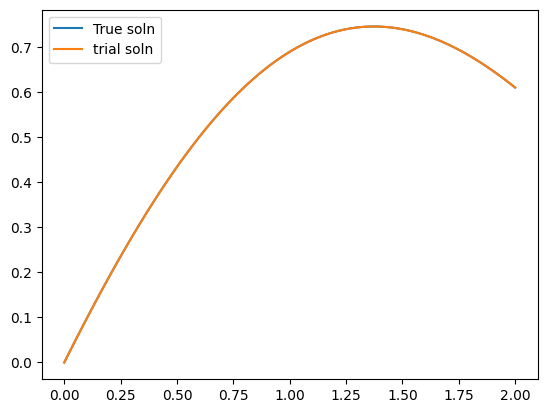

In [19]:
import matplotlib.pyplot as plt
plt.plot(x_test,( ya),label = 'True soln')
plt.plot(x_test,( (yt).reshape(100,1)),label = 'trial soln')
plt.legend()

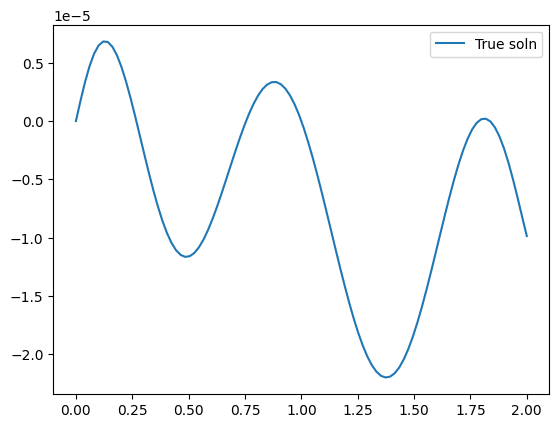

In [20]:
import matplotlib.pyplot as plt
plt.plot(x_test,( ya-yt),label = 'True soln')
# plt.plot(x_test,( (yt).reshape(100,1)),label = 'trial soln')
plt.legend()

Error Plots for different Training points and Different Hidden units

In [21]:
def error_min_train_hidd(neurons, train_points):
  # Training Points                                                               # Intial Values
  x_train = np.linspace(0,2,train_points)

  n_inputs = 1
  n_neurons = neurons
  p = np.random.randn(1,3*n_neurons)
  p =p[0]
  res = minimize(error3, p, method='BFGS', jac=grad3,args=(x_train), options={ 'disp': False})
  return res.x

In [ ]:
def plot_for_diff_hidd_units(list_neurons, train_points):
  x_test = np.linspace(0,2,100)
  for neurons in list_neurons:
    ysum=0
    run = 20
    for i in range(run):
      weights = error_min_train_hidd(neurons, train_points)


      _, N = layer1NN(weights ,x_test)
      yi = x_test*np.sin(1)*np.exp(-1/5)  + (x_test - x_test**2)*N
      ysum += yi
    yt = ysum/run
    ya = my_function3(x_test)
    plt.plot(x_test,((ya - yt).reshape(100,1)),label = 'error for hidden units = {}'.format(neurons))
  plt.legend()
  plt.title('No. of Training points are {}'.format(train_points))
  plt.show()

In [ ]:
for i in range(10,110,10):
  list_neuron = [10,15,20,40,80,100]
  plot_for_diff_hidd_units(list_neuron, i)

Output hidden; open in https://colab.research.google.com to view.

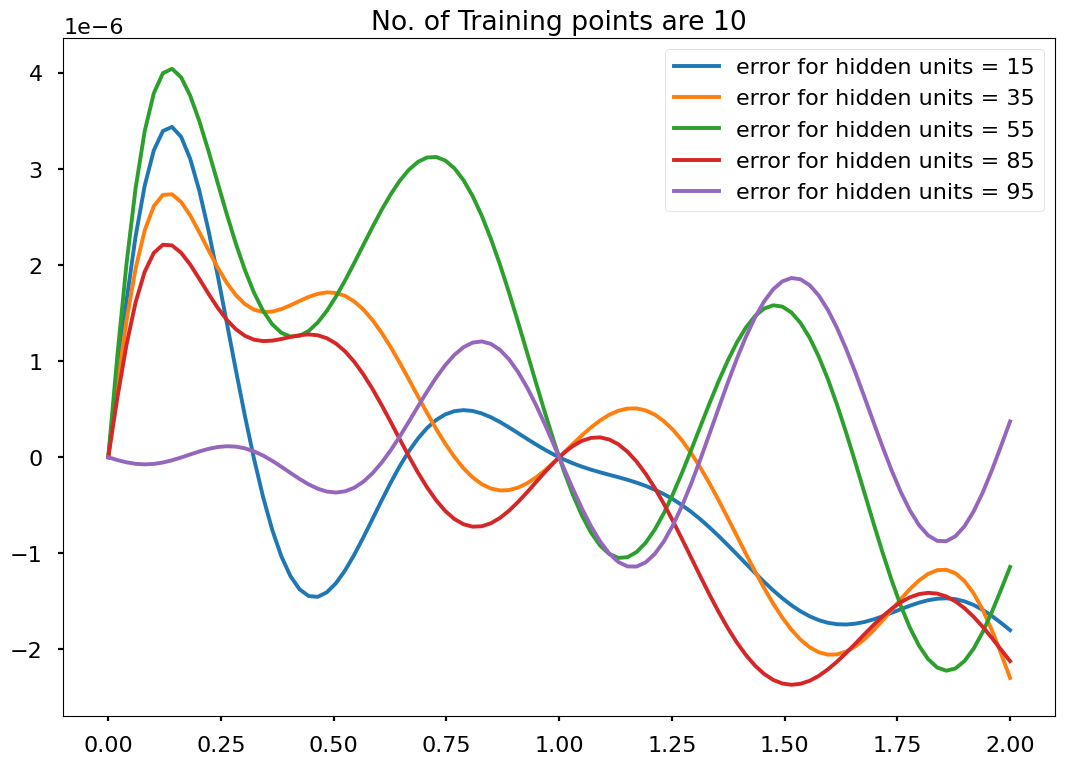

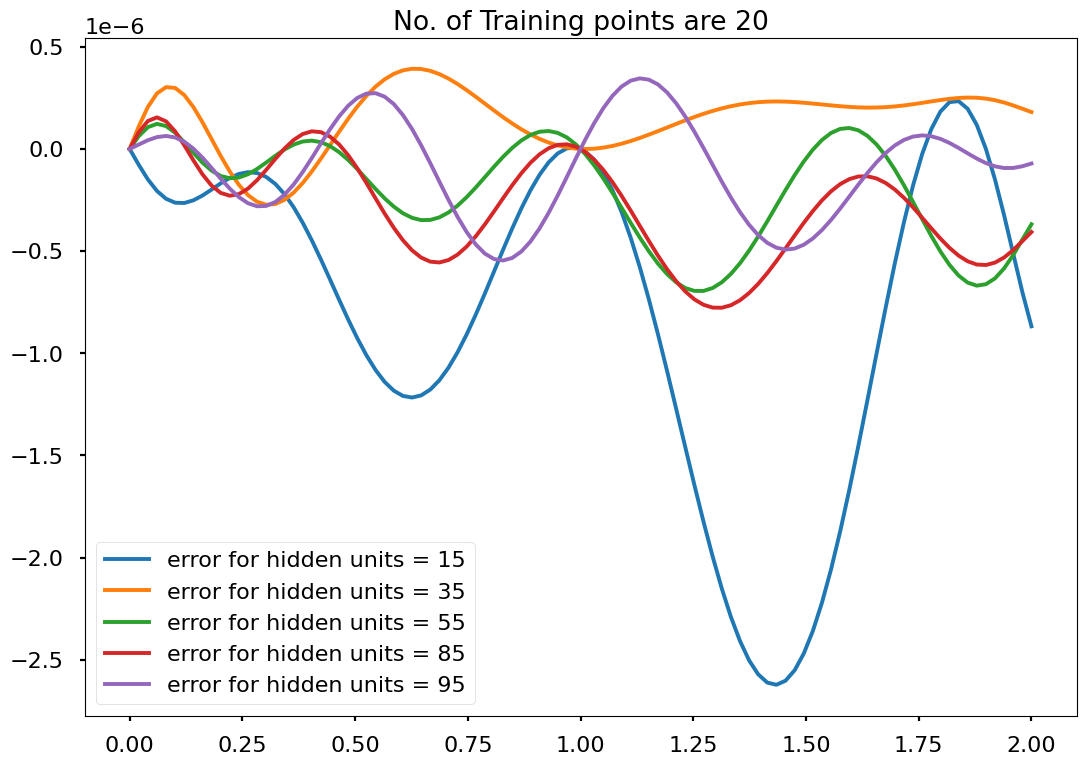

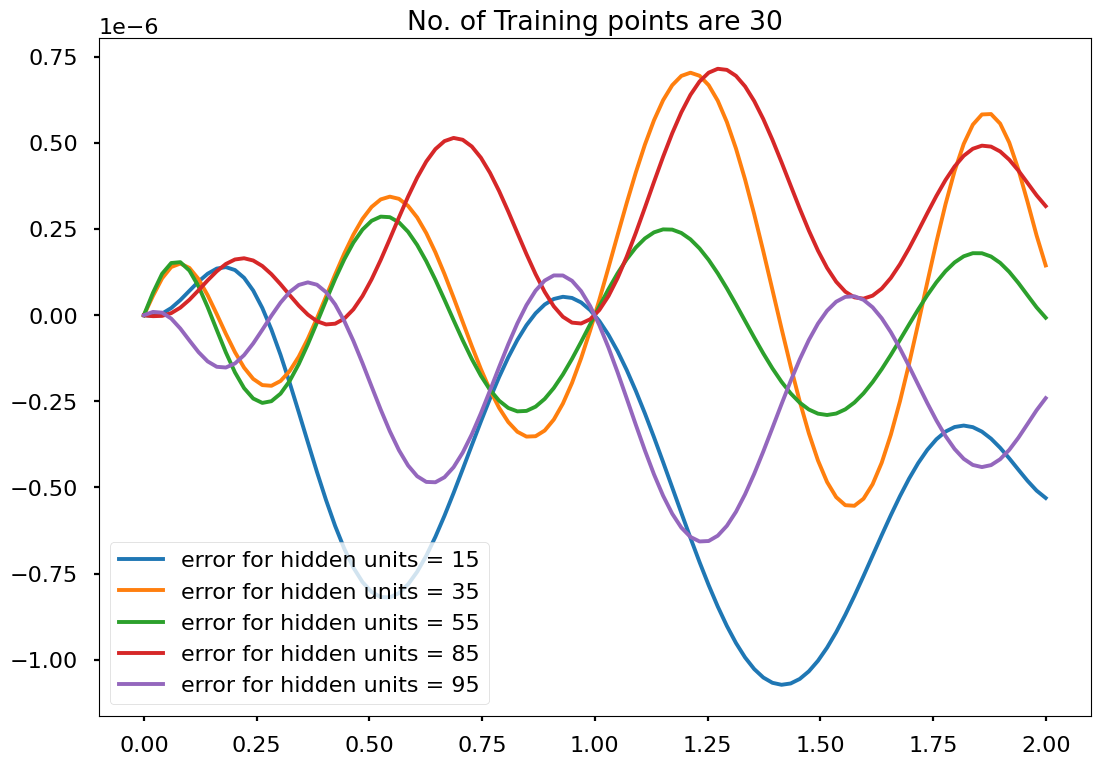

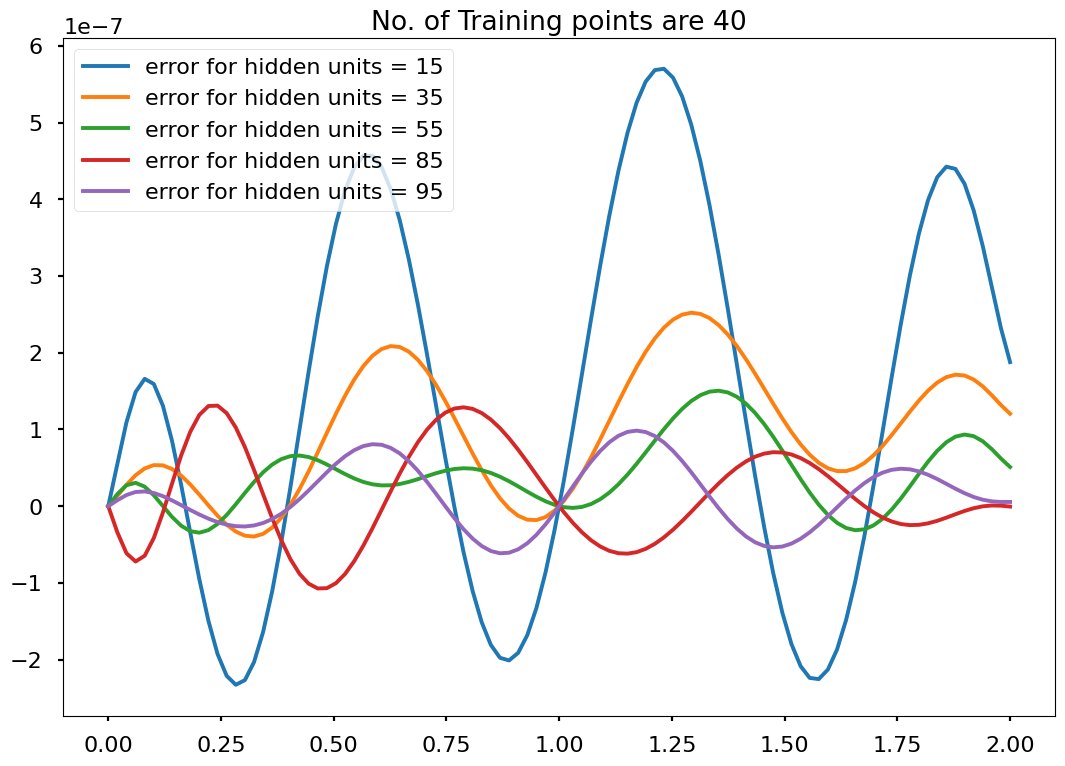

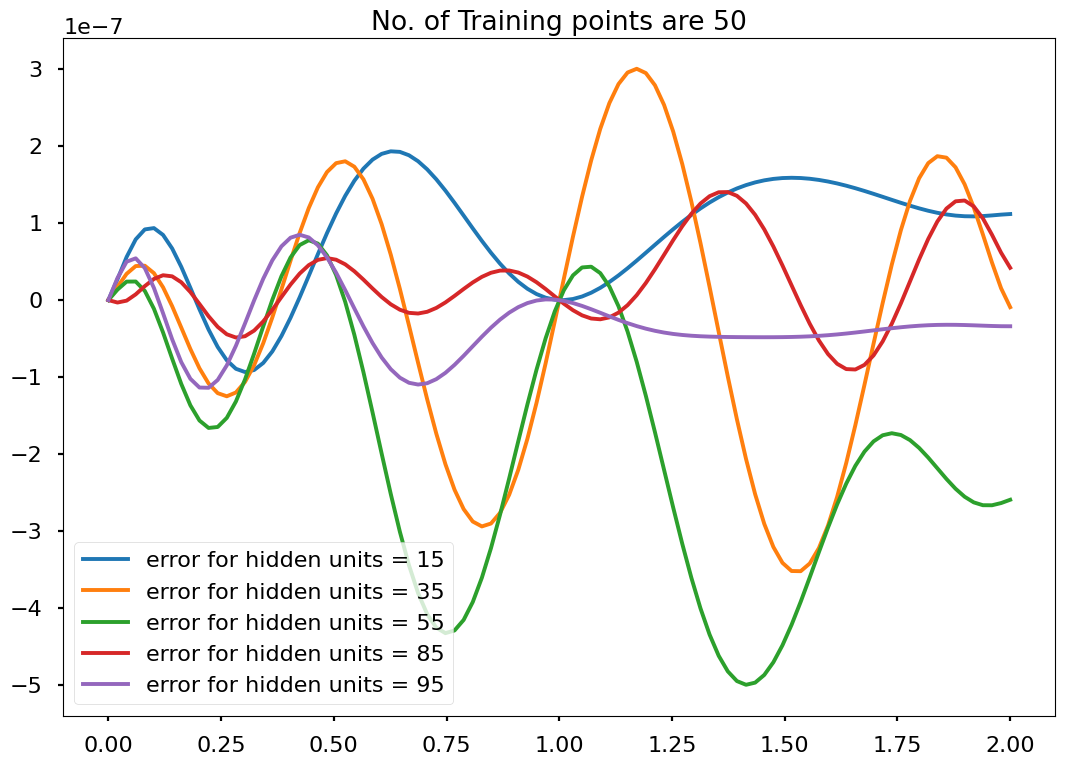

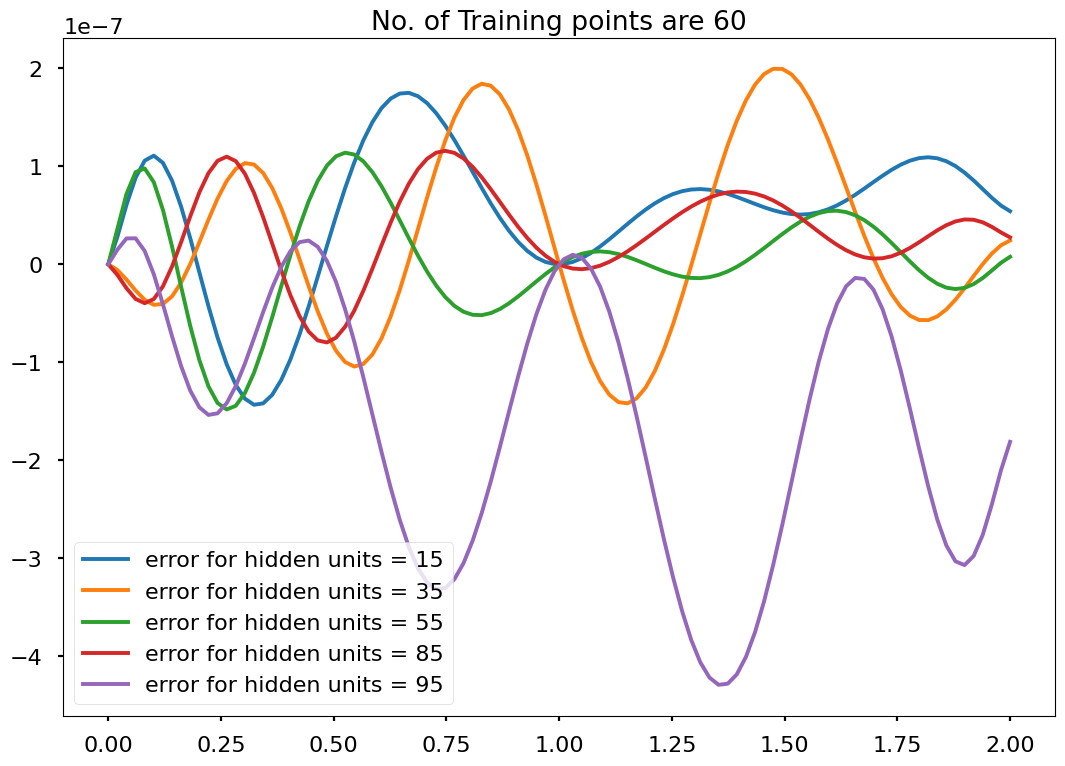

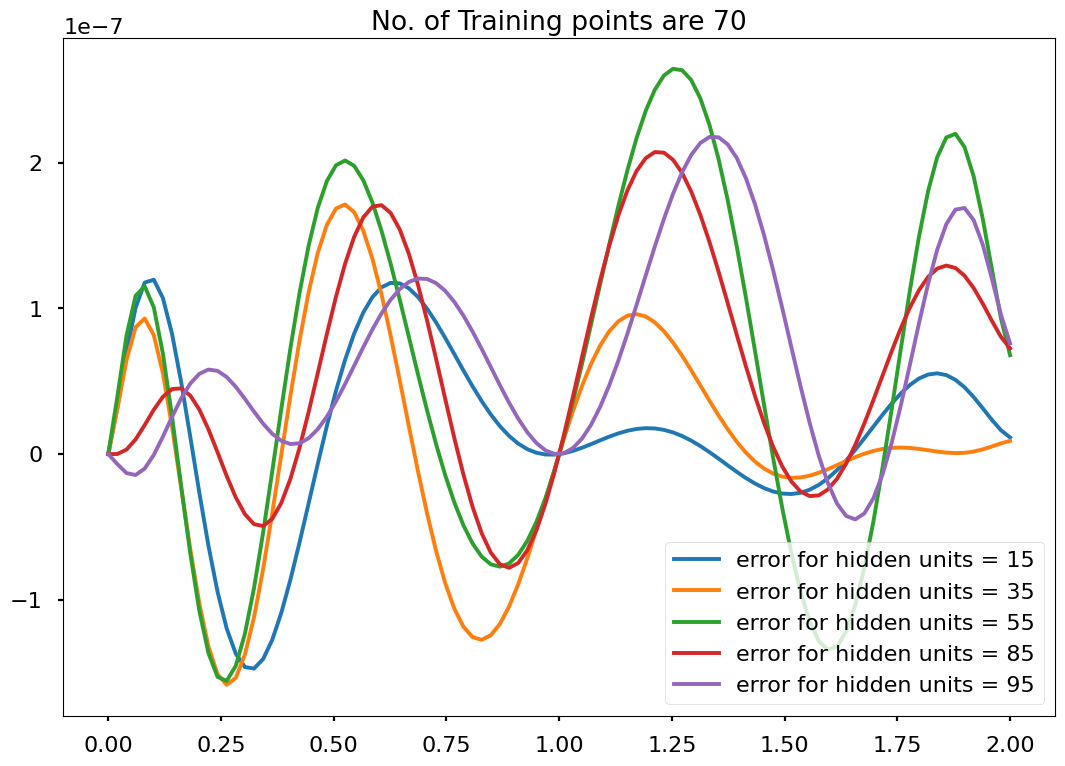

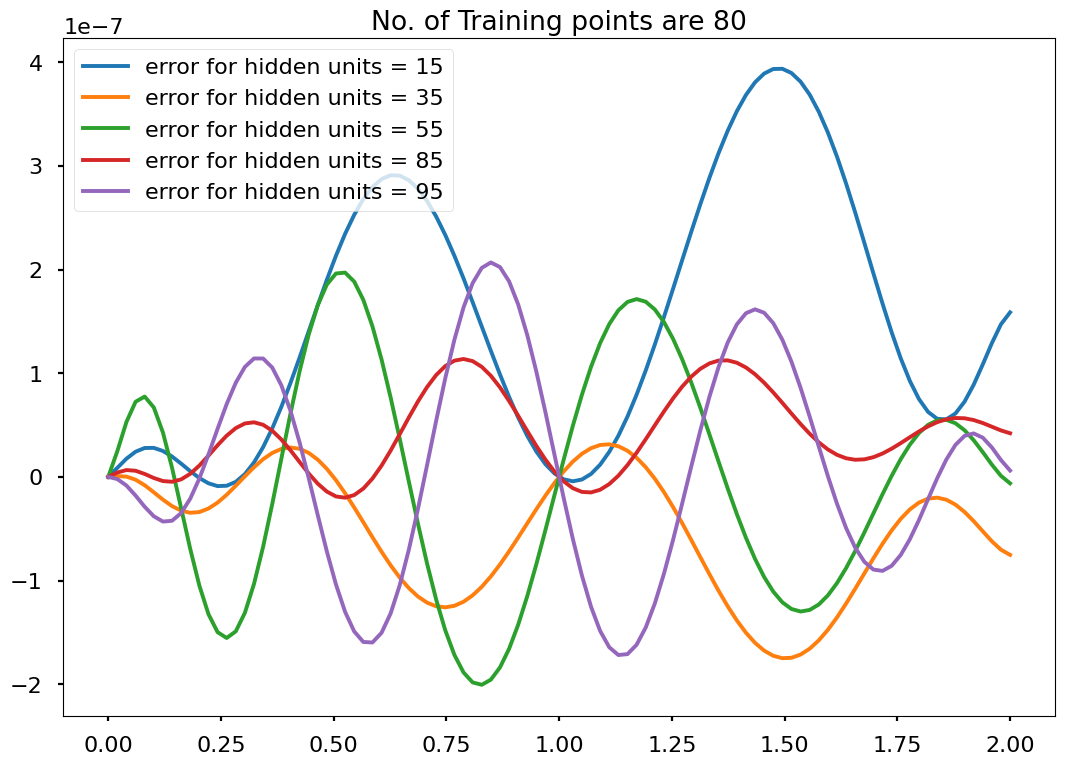

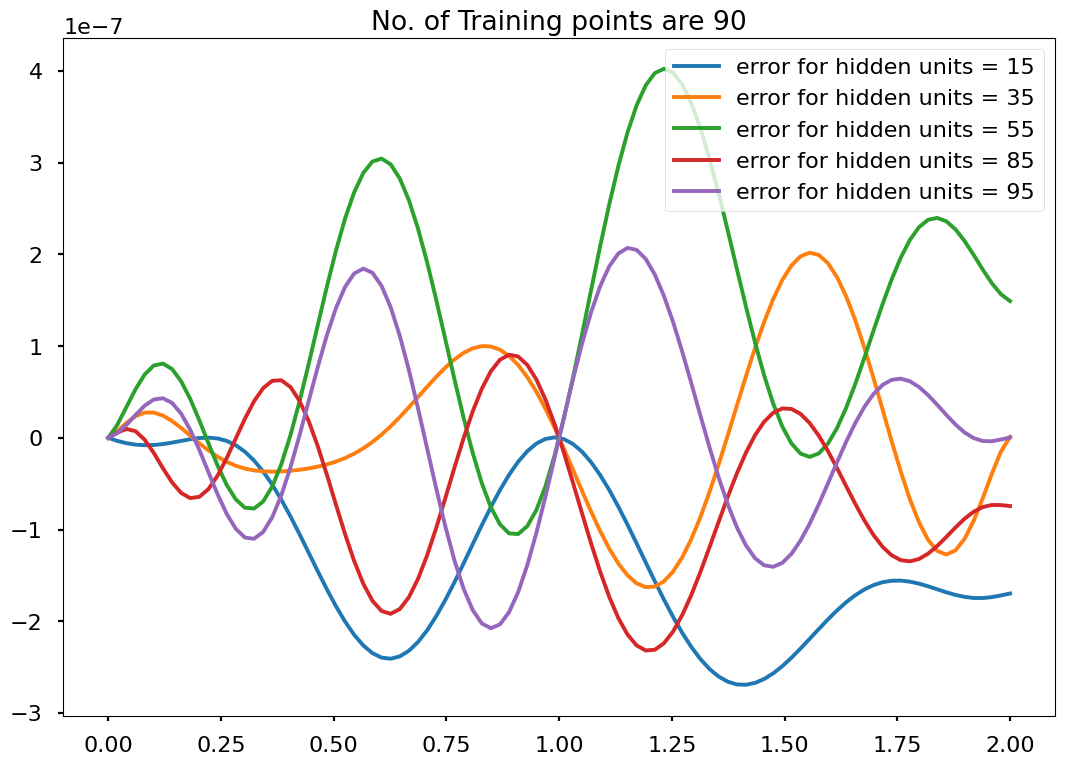

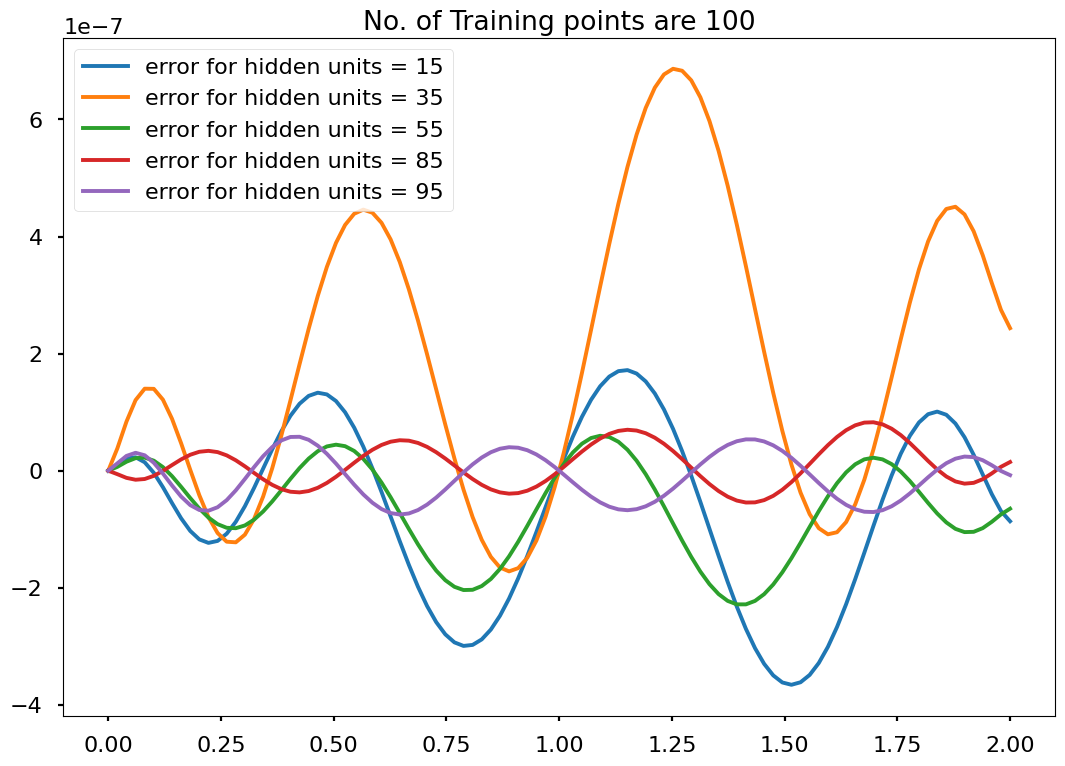

In [ ]:
for i in range(10,110,10):
  list_neuron = [15,35,55,85,95]
  plot_for_diff_hidd_units(list_neuron, i)

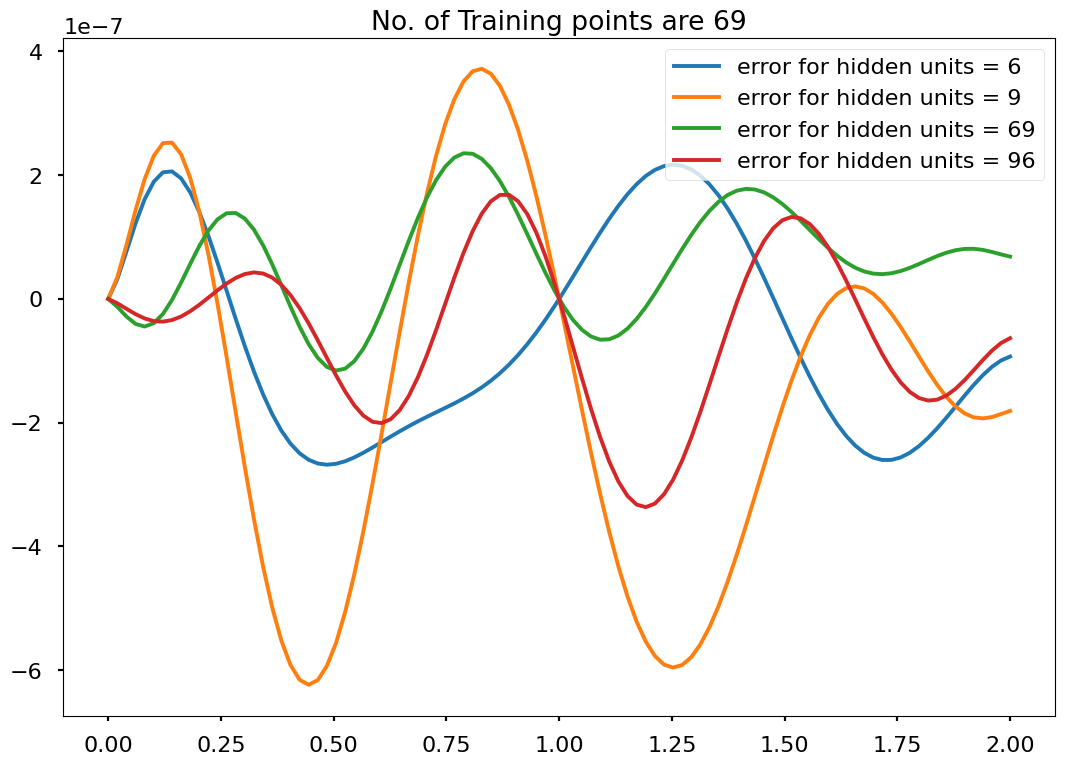

In [ ]:
  list_neuron = [6,9,69,96]
  plot_for_diff_hidd_units(list_neuron, 69)

In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.8/258.8 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.0 MB/s eta 0:00:00


In [ ]:
import wandb
wandb.login(key='da5365b4335ad8c7a1df7f3653ec9d0b092e8b09')

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# You need to define a config file in the form of dictionary or yaml
sweep_config = {
    'method': 'grid',
    'name': 'sweep Hidden Units Training Datasets',
    'metric': {
        'name': 'Error',
        'goal': 'minimize'
    },
    'parameters': {
        'hiddenUnits': {
            'values': [i for i in range(10, 105, 5)]
        },
        'trainingPoints': {
            'values': [i for i in range(10, 110, 10)]
        }
    }
}

sweep_id = wandb.sweep(sweep=sweep_config, project='ANN_Proj_Ques_3b_new')

Create sweep with ID: eye337fj
Sweep URL: https://wandb.ai/shubham821/ANN_Proj_Ques_3b_new/sweeps/eye337fj


In [ ]:
import wandb
import numpy as np
from scipy.optimize import minimize

def Error(config):
    hiddenUnits = config['hiddenUnits']
    trainingPoints = config['trainingPoints']
    x_test = np.linspace(0, 2, 100)

    ysum=0
    run = 20
    for i in range(run):
      weights = error_min_train_hidd(hiddenUnits, trainingPoints)


      _, N = layer1NN(weights ,x_test)
      yi = x_test*np.sin(1)*np.exp(-1/5)  + (x_test - x_test**2)*N
      ysum += yi
    yt = ysum/run
    ya = my_function3(x_test)
    err = np.linalg.norm(yt-ya)

    wandb.log({"Error": err})



In [ ]:
def main():
    '''
    WandB calls main function each time with different combination.

    We can retrieve the same and use the same values for our hyperparameters.
    '''
    with wandb.init() as run:
        run_name = "-Hidd_units" + str(wandb.config.hiddenUnits) + "-Train_points_" + str(wandb.config.trainingPoints)
        wandb.run.name = run_name
        #obj=NN(wandb.config['num_layers'],wandb.config['hidden_size'])

        Error(wandb.config)

wandb.agent(sweep_id, function=main)  # calls main function for count number of times.
wandb.finish()

wandb: Agent Starting Run: 76xunx1r with config:
wandb: 	hiddenUnits: 10
wandb: 	trainingPoints: 10


Error,▁
Error,2e-05


wandb: Agent Starting Run: rpm78xu3 with config:
wandb: 	hiddenUnits: 10
wandb: 	trainingPoints: 20


Error,▁
Error,0.0


wandb: Agent Starting Run: 80ysssr0 with config:
wandb: 	hiddenUnits: 10
wandb: 	trainingPoints: 30


Error,▁
Error,1e-05


wandb: Agent Starting Run: bmv4xaxq with config:
wandb: 	hiddenUnits: 10
wandb: 	trainingPoints: 40


Error,▁
Error,0.0


wandb: Agent Starting Run: wsqbt3vr with config:
wandb: 	hiddenUnits: 10
wandb: 	trainingPoints: 50


Error,▁
Error,1e-05


wandb: Agent Starting Run: 8b7lajz6 with config:
wandb: 	hiddenUnits: 10
wandb: 	trainingPoints: 60


Error,▁
Error,0.0


wandb: Agent Starting Run: 06q79c5m with config:
wandb: 	hiddenUnits: 10
wandb: 	trainingPoints: 70


Error,▁
Error,0.0


wandb: Agent Starting Run: ty8yd0gi with config:
wandb: 	hiddenUnits: 10
wandb: 	trainingPoints: 80


Error,▁
Error,0.0


wandb: Agent Starting Run: 9n48bbi2 with config:
wandb: 	hiddenUnits: 10
wandb: 	trainingPoints: 90


Error,▁
Error,0.0


wandb: Agent Starting Run: 0rr0br7x with config:
wandb: 	hiddenUnits: 10
wandb: 	trainingPoints: 100


Error,▁
Error,0.0


wandb: Agent Starting Run: b2u9iuqp with config:
wandb: 	hiddenUnits: 15
wandb: 	trainingPoints: 10


Error,▁
Error,1e-05


wandb: Agent Starting Run: gbayprfl with config:
wandb: 	hiddenUnits: 15
wandb: 	trainingPoints: 20


Error,▁
Error,0.0


wandb: Agent Starting Run: sbnmk6bf with config:
wandb: 	hiddenUnits: 15
wandb: 	trainingPoints: 30


Error,▁
Error,0.0


wandb: Agent Starting Run: 0817ickq with config:
wandb: 	hiddenUnits: 15
wandb: 	trainingPoints: 40


Error,▁
Error,0.0


wandb: Agent Starting Run: xumej7q6 with config:
wandb: 	hiddenUnits: 15
wandb: 	trainingPoints: 50


Error,▁
Error,0.0


wandb: Agent Starting Run: lkygejeg with config:
wandb: 	hiddenUnits: 15
wandb: 	trainingPoints: 60


Error,▁
Error,0.0


wandb: Agent Starting Run: 2bvxzd6m with config:
wandb: 	hiddenUnits: 15
wandb: 	trainingPoints: 70


Error,▁
Error,0.0


wandb: Agent Starting Run: 4xzbprhc with config:
wandb: 	hiddenUnits: 15
wandb: 	trainingPoints: 80


Error,▁
Error,0.0


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 91m9qw8n with config:
wandb: 	hiddenUnits: 15
wandb: 	trainingPoints: 90


Error,▁
Error,0.0


wandb: Agent Starting Run: qejxtb7g with config:
wandb: 	hiddenUnits: 15
wandb: 	trainingPoints: 100


Error,▁
Error,0.0


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: e3rcyuvx with config:
wandb: 	hiddenUnits: 20
wandb: 	trainingPoints: 10


Error,▁
Error,1e-05


wandb: Agent Starting Run: sbxb4h0v with config:
wandb: 	hiddenUnits: 20
wandb: 	trainingPoints: 20


Error,▁
Error,1e-05


wandb: Agent Starting Run: ocxxtt1a with config:
wandb: 	hiddenUnits: 20
wandb: 	trainingPoints: 30


Error,▁
Error,0.0


wandb: Agent Starting Run: f21c4o02 with config:
wandb: 	hiddenUnits: 20
wandb: 	trainingPoints: 40


Error,▁
Error,0.0


wandb: Agent Starting Run: u70tib6d with config:
wandb: 	hiddenUnits: 20
wandb: 	trainingPoints: 50


Error,▁
Error,0.0


wandb: Agent Starting Run: wvwuyify with config:
wandb: 	hiddenUnits: 20
wandb: 	trainingPoints: 60


Error,▁
Error,0.0


wandb: Agent Starting Run: y576xz4j with config:
wandb: 	hiddenUnits: 20
wandb: 	trainingPoints: 70


Error,▁
Error,0.0


wandb: Agent Starting Run: wh01sg60 with config:
wandb: 	hiddenUnits: 20
wandb: 	trainingPoints: 80


Error,▁
Error,0.0


wandb: Agent Starting Run: s513nd98 with config:
wandb: 	hiddenUnits: 20
wandb: 	trainingPoints: 90


Error,▁
Error,0.0


wandb: Agent Starting Run: x7flhdh6 with config:
wandb: 	hiddenUnits: 20
wandb: 	trainingPoints: 100


Error,▁
Error,0.0


wandb: Agent Starting Run: weswwd0i with config:
wandb: 	hiddenUnits: 25
wandb: 	trainingPoints: 10


Error,▁
Error,2e-05


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: i8nglz6j with config:
wandb: 	hiddenUnits: 25
wandb: 	trainingPoints: 20


Error,▁
Error,0.0


wandb: Agent Starting Run: 0z56k01s with config:
wandb: 	hiddenUnits: 25
wandb: 	trainingPoints: 30


Error,▁
Error,0.0


wandb: Agent Starting Run: r726od9z with config:
wandb: 	hiddenUnits: 25
wandb: 	trainingPoints: 40


Error,▁
Error,0.0


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 6atvrxge with config:
wandb: 	hiddenUnits: 25
wandb: 	trainingPoints: 50


Error,▁
Error,0.0


wandb: Agent Starting Run: 8deqs4fi with config:
wandb: 	hiddenUnits: 25
wandb: 	trainingPoints: 60


Error,▁
Error,0.0


wandb: Agent Starting Run: 8kz05nt9 with config:
wandb: 	hiddenUnits: 25
wandb: 	trainingPoints: 70


Error,▁
Error,0.0


wandb: Agent Starting Run: o3b5tr88 with config:
wandb: 	hiddenUnits: 25
wandb: 	trainingPoints: 80


Error,▁
Error,0.0


wandb: Agent Starting Run: ibez7gw5 with config:
wandb: 	hiddenUnits: 25
wandb: 	trainingPoints: 90


Error,▁
Error,0.0


wandb: Agent Starting Run: id8gb3g7 with config:
wandb: 	hiddenUnits: 25
wandb: 	trainingPoints: 100


Error,▁
Error,0.0


wandb: Agent Starting Run: u36ht8hr with config:
wandb: 	hiddenUnits: 30
wandb: 	trainingPoints: 10


Error,▁
Error,1e-05


wandb: Agent Starting Run: 7ufdjor3 with config:
wandb: 	hiddenUnits: 30
wandb: 	trainingPoints: 20


Error,▁
Error,1e-05


wandb: Agent Starting Run: ur1wdpky with config:
wandb: 	hiddenUnits: 30
wandb: 	trainingPoints: 30


Error,▁
Error,0.0


wandb: Agent Starting Run: ih7r9vmt with config:
wandb: 	hiddenUnits: 30
wandb: 	trainingPoints: 40


Error,▁
Error,0.0


wandb: Agent Starting Run: f2oekcqy with config:
wandb: 	hiddenUnits: 30
wandb: 	trainingPoints: 50


Error,▁
Error,0.0


wandb: Agent Starting Run: mv0n98gn with config:
wandb: 	hiddenUnits: 30
wandb: 	trainingPoints: 60


Error,▁
Error,0.0


wandb: Agent Starting Run: 6liej863 with config:
wandb: 	hiddenUnits: 30
wandb: 	trainingPoints: 70


Error,▁
Error,0.0


wandb: Agent Starting Run: 54xn43gf with config:
wandb: 	hiddenUnits: 30
wandb: 	trainingPoints: 80


Error,▁
Error,0.0


wandb: Agent Starting Run: 590gnpjc with config:
wandb: 	hiddenUnits: 30
wandb: 	trainingPoints: 90


Error,▁
Error,0.0


wandb: Agent Starting Run: higd3b9r with config:
wandb: 	hiddenUnits: 30
wandb: 	trainingPoints: 100


Error,▁
Error,0.0


wandb: Agent Starting Run: gesopahg with config:
wandb: 	hiddenUnits: 35
wandb: 	trainingPoints: 10


Error,▁
Error,1e-05


wandb: Agent Starting Run: 24v2oniz with config:
wandb: 	hiddenUnits: 35
wandb: 	trainingPoints: 20


Error,▁
Error,0.0


wandb: Agent Starting Run: 9m6lfd1m with config:
wandb: 	hiddenUnits: 35
wandb: 	trainingPoints: 30


Error,▁
Error,0.0


wandb: Agent Starting Run: tnl2sfuc with config:
wandb: 	hiddenUnits: 35
wandb: 	trainingPoints: 40


Error,▁
Error,0.0


wandb: Agent Starting Run: e5jjkgq0 with config:
wandb: 	hiddenUnits: 35
wandb: 	trainingPoints: 50


Error,▁
Error,0.0


wandb: Agent Starting Run: fu6f2is2 with config:
wandb: 	hiddenUnits: 35
wandb: 	trainingPoints: 60


Error,▁
Error,0.0


wandb: Agent Starting Run: mo12nsa0 with config:
wandb: 	hiddenUnits: 35
wandb: 	trainingPoints: 70


Error,▁
Error,0.0


wandb: Agent Starting Run: lwai4bc2 with config:
wandb: 	hiddenUnits: 35
wandb: 	trainingPoints: 80


Error,▁
Error,0.0


wandb: Agent Starting Run: gig2y9df with config:
wandb: 	hiddenUnits: 35
wandb: 	trainingPoints: 90


Error,▁
Error,0.0


wandb: Agent Starting Run: nt8b7d88 with config:
wandb: 	hiddenUnits: 35
wandb: 	trainingPoints: 100


Error,▁
Error,0.0


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: sum49m4m with config:
wandb: 	hiddenUnits: 40
wandb: 	trainingPoints: 10


Error,▁
Error,0.00017


wandb: Agent Starting Run: 0zj8wrke with config:
wandb: 	hiddenUnits: 40
wandb: 	trainingPoints: 20


Error,▁
Error,0.0


wandb: Agent Starting Run: 1c06jyhz with config:
wandb: 	hiddenUnits: 40
wandb: 	trainingPoints: 30


Error,▁
Error,0.0


wandb: Agent Starting Run: uvscv5a3 with config:
wandb: 	hiddenUnits: 40
wandb: 	trainingPoints: 40


Error,▁
Error,0.0


wandb: Agent Starting Run: 7yyv8bjq with config:
wandb: 	hiddenUnits: 40
wandb: 	trainingPoints: 50


Error,▁
Error,0.0


wandb: Agent Starting Run: n6312li6 with config:
wandb: 	hiddenUnits: 40
wandb: 	trainingPoints: 60


Error,▁
Error,0.0


wandb: Agent Starting Run: xhjcdqhn with config:
wandb: 	hiddenUnits: 40
wandb: 	trainingPoints: 70


Error,▁
Error,0.0


wandb: Agent Starting Run: 9vrycx6c with config:
wandb: 	hiddenUnits: 40
wandb: 	trainingPoints: 80


Error,▁
Error,0.0


wandb: Agent Starting Run: c6y49b8f with config:
wandb: 	hiddenUnits: 40
wandb: 	trainingPoints: 90


Error,▁
Error,0.0


wandb: Agent Starting Run: mi3mhtrp with config:
wandb: 	hiddenUnits: 40
wandb: 	trainingPoints: 100


Error,▁
Error,0.0


wandb: Agent Starting Run: 05sonx8l with config:
wandb: 	hiddenUnits: 45
wandb: 	trainingPoints: 10


Error,▁
Error,2e-05


wandb: Agent Starting Run: zt4pmg28 with config:
wandb: 	hiddenUnits: 45
wandb: 	trainingPoints: 20


Error,▁
Error,0.0


wandb: Agent Starting Run: av6u4ss5 with config:
wandb: 	hiddenUnits: 45
wandb: 	trainingPoints: 30


Error,▁
Error,0.0


wandb: Agent Starting Run: f0pkmec3 with config:
wandb: 	hiddenUnits: 45
wandb: 	trainingPoints: 40


Error,▁
Error,0.0


wandb: Agent Starting Run: q6jfs5oy with config:
wandb: 	hiddenUnits: 45
wandb: 	trainingPoints: 50


Error,▁
Error,0.0


wandb: Agent Starting Run: 45ggw6ia with config:
wandb: 	hiddenUnits: 45
wandb: 	trainingPoints: 60


Error,▁
Error,0.0


wandb: Agent Starting Run: zhx5f9lt with config:
wandb: 	hiddenUnits: 45
wandb: 	trainingPoints: 70


Error,▁
Error,0.0


wandb: Agent Starting Run: ll1s1czx with config:
wandb: 	hiddenUnits: 45
wandb: 	trainingPoints: 80


Error,▁
Error,0.0


wandb: Agent Starting Run: 4wfohuf1 with config:
wandb: 	hiddenUnits: 45
wandb: 	trainingPoints: 90


Error,▁
Error,0.0


wandb: Agent Starting Run: c4tkt0g4 with config:
wandb: 	hiddenUnits: 45
wandb: 	trainingPoints: 100


Error,▁
Error,0.0


wandb: Agent Starting Run: or4gpvkn with config:
wandb: 	hiddenUnits: 50
wandb: 	trainingPoints: 10


Error,▁
Error,2e-05


wandb: Agent Starting Run: obgtchgl with config:
wandb: 	hiddenUnits: 50
wandb: 	trainingPoints: 20


Error,▁
Error,1e-05


wandb: Agent Starting Run: 38qgycdm with config:
wandb: 	hiddenUnits: 50
wandb: 	trainingPoints: 30


Error,▁
Error,0.0


wandb: Agent Starting Run: yao6espf with config:
wandb: 	hiddenUnits: 50
wandb: 	trainingPoints: 40


Error,▁
Error,0.0


wandb: Agent Starting Run: 51oete6p with config:
wandb: 	hiddenUnits: 50
wandb: 	trainingPoints: 50


Error,▁
Error,0.0


wandb: Agent Starting Run: 7palytbn with config:
wandb: 	hiddenUnits: 50
wandb: 	trainingPoints: 60


Error,▁
Error,0.0


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 0wr8ql3s with config:
wandb: 	hiddenUnits: 50
wandb: 	trainingPoints: 70


Error,▁
Error,0.0


wandb: Agent Starting Run: jz7bacot with config:
wandb: 	hiddenUnits: 50
wandb: 	trainingPoints: 80


Error,▁
Error,0.0


wandb: Agent Starting Run: bsy004to with config:
wandb: 	hiddenUnits: 50
wandb: 	trainingPoints: 90


Error,▁
Error,0.0


wandb: Agent Starting Run: 2ejforbs with config:
wandb: 	hiddenUnits: 50
wandb: 	trainingPoints: 100


Error,▁
Error,0.0


wandb: Agent Starting Run: 8kl7vi3q with config:
wandb: 	hiddenUnits: 55
wandb: 	trainingPoints: 10


Error,▁
Error,1e-05


wandb: Agent Starting Run: i8rmk415 with config:
wandb: 	hiddenUnits: 55
wandb: 	trainingPoints: 20


Error,▁
Error,0.0


wandb: Agent Starting Run: exdurind with config:
wandb: 	hiddenUnits: 55
wandb: 	trainingPoints: 30


Error,▁
Error,0.0


wandb: Agent Starting Run: ixwr2j4y with config:
wandb: 	hiddenUnits: 55
wandb: 	trainingPoints: 40


Error,▁
Error,0.0


wandb: Agent Starting Run: a0whlqe9 with config:
wandb: 	hiddenUnits: 55
wandb: 	trainingPoints: 50


Error,▁
Error,0.0


wandb: Agent Starting Run: lsdqwnge with config:
wandb: 	hiddenUnits: 55
wandb: 	trainingPoints: 60


Error,▁
Error,0.0


wandb: Agent Starting Run: 6s4ynkip with config:
wandb: 	hiddenUnits: 55
wandb: 	trainingPoints: 70


Error,▁
Error,0.0


wandb: Agent Starting Run: e00zvbh8 with config:
wandb: 	hiddenUnits: 55
wandb: 	trainingPoints: 80


Error,▁
Error,0.0


wandb: Agent Starting Run: c7parqh2 with config:
wandb: 	hiddenUnits: 55
wandb: 	trainingPoints: 90


Error,▁
Error,0.0


wandb: Agent Starting Run: guhxpdd0 with config:
wandb: 	hiddenUnits: 55
wandb: 	trainingPoints: 100


Error,▁
Error,0.0


wandb: Agent Starting Run: df0d08iz with config:
wandb: 	hiddenUnits: 60
wandb: 	trainingPoints: 10


Error,▁
Error,4e-05


wandb: Agent Starting Run: st0baaem with config:
wandb: 	hiddenUnits: 60
wandb: 	trainingPoints: 20


Error,▁
Error,0.0


wandb: Agent Starting Run: v59kdzom with config:
wandb: 	hiddenUnits: 60
wandb: 	trainingPoints: 30


Error,▁
Error,0.0


wandb: Agent Starting Run: ka2p1e0z with config:
wandb: 	hiddenUnits: 60
wandb: 	trainingPoints: 40


Error,▁
Error,0.0


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: gv2gg3yt with config:
wandb: 	hiddenUnits: 60
wandb: 	trainingPoints: 50


Error,▁
Error,0.0


wandb: Agent Starting Run: i5veovds with config:
wandb: 	hiddenUnits: 60
wandb: 	trainingPoints: 60


Error,▁
Error,0.0


wandb: Agent Starting Run: 4dveieen with config:
wandb: 	hiddenUnits: 60
wandb: 	trainingPoints: 70


Error,▁
Error,0.0


wandb: Agent Starting Run: 6ck0gibg with config:
wandb: 	hiddenUnits: 60
wandb: 	trainingPoints: 80


Error,▁
Error,0.0


wandb: Agent Starting Run: wxpjkwix with config:
wandb: 	hiddenUnits: 60
wandb: 	trainingPoints: 90


Error,▁
Error,0.0


wandb: Agent Starting Run: y8pzpnvd with config:
wandb: 	hiddenUnits: 60
wandb: 	trainingPoints: 100


Error,▁
Error,0.0


wandb: Agent Starting Run: 7bcy6lf0 with config:
wandb: 	hiddenUnits: 65
wandb: 	trainingPoints: 10


Error,▁
Error,1e-05


wandb: Agent Starting Run: x04v1b6d with config:
wandb: 	hiddenUnits: 65
wandb: 	trainingPoints: 20


Error,▁
Error,0.0


wandb: Agent Starting Run: yiakhwz9 with config:
wandb: 	hiddenUnits: 65
wandb: 	trainingPoints: 30


Error,▁
Error,0.0


wandb: Agent Starting Run: qw3gvzrp with config:
wandb: 	hiddenUnits: 65
wandb: 	trainingPoints: 40


Error,▁
Error,0.0


wandb: Agent Starting Run: s3tbksb1 with config:
wandb: 	hiddenUnits: 65
wandb: 	trainingPoints: 50


Error,▁
Error,0.0


wandb: Agent Starting Run: bdu468ku with config:
wandb: 	hiddenUnits: 65
wandb: 	trainingPoints: 60


Error,▁
Error,0.0


wandb: Agent Starting Run: ftgyedky with config:
wandb: 	hiddenUnits: 65
wandb: 	trainingPoints: 70


Error,▁
Error,0.0


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: x9poo6ff with config:
wandb: 	hiddenUnits: 65
wandb: 	trainingPoints: 80


Error,▁
Error,0.0


wandb: Agent Starting Run: smerlnd7 with config:
wandb: 	hiddenUnits: 65
wandb: 	trainingPoints: 90


Error,▁
Error,0.0


wandb: Agent Starting Run: u3qr86k3 with config:
wandb: 	hiddenUnits: 65
wandb: 	trainingPoints: 100


Error,▁
Error,0.0


wandb: Agent Starting Run: o1xwasrv with config:
wandb: 	hiddenUnits: 70
wandb: 	trainingPoints: 10


Error,▁
Error,0.0


wandb: Agent Starting Run: mxe1j2kb with config:
wandb: 	hiddenUnits: 70
wandb: 	trainingPoints: 20


Error,▁
Error,1e-05


wandb: Agent Starting Run: gp2trcfm with config:
wandb: 	hiddenUnits: 70
wandb: 	trainingPoints: 30


Error,▁
Error,0.0


wandb: Agent Starting Run: h7qp6174 with config:
wandb: 	hiddenUnits: 70
wandb: 	trainingPoints: 40


Error,▁
Error,0.0


wandb: Agent Starting Run: acnrvku3 with config:
wandb: 	hiddenUnits: 70
wandb: 	trainingPoints: 50


Error,▁
Error,0.0


wandb: Agent Starting Run: tuo1ri6f with config:
wandb: 	hiddenUnits: 70
wandb: 	trainingPoints: 60


Error,▁
Error,0.0


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: rxlcq3dc with config:
wandb: 	hiddenUnits: 70
wandb: 	trainingPoints: 70


Error,▁
Error,0.0


wandb: Agent Starting Run: 39lhn42f with config:
wandb: 	hiddenUnits: 70
wandb: 	trainingPoints: 80


Error,▁
Error,0.0


wandb: Agent Starting Run: hy2tznoc with config:
wandb: 	hiddenUnits: 70
wandb: 	trainingPoints: 90


Error,▁
Error,0.0


wandb: Agent Starting Run: 3yllwtix with config:
wandb: 	hiddenUnits: 70
wandb: 	trainingPoints: 100


Error,▁
Error,0.0


wandb: Agent Starting Run: yfbd3437 with config:
wandb: 	hiddenUnits: 75
wandb: 	trainingPoints: 10


Error,▁
Error,1e-05


wandb: Agent Starting Run: vnyzjghh with config:
wandb: 	hiddenUnits: 75
wandb: 	trainingPoints: 20


Error,▁
Error,0.0


wandb: Agent Starting Run: 1cbipzov with config:
wandb: 	hiddenUnits: 75
wandb: 	trainingPoints: 30


Error,▁
Error,0.0


wandb: Agent Starting Run: m2wltggu with config:
wandb: 	hiddenUnits: 75
wandb: 	trainingPoints: 40


Error,▁
Error,0.0


wandb: Agent Starting Run: vhxtx8w6 with config:
wandb: 	hiddenUnits: 75
wandb: 	trainingPoints: 50


Error,▁
Error,0.0


wandb: Agent Starting Run: ao6v1daj with config:
wandb: 	hiddenUnits: 75
wandb: 	trainingPoints: 60


Error,▁
Error,0.0


wandb: Agent Starting Run: ew99wirl with config:
wandb: 	hiddenUnits: 75
wandb: 	trainingPoints: 70


Error,▁
Error,0.0


wandb: Agent Starting Run: 6ckx863w with config:
wandb: 	hiddenUnits: 75
wandb: 	trainingPoints: 80


Error,▁
Error,0.0


wandb: Agent Starting Run: rgtk4q9o with config:
wandb: 	hiddenUnits: 75
wandb: 	trainingPoints: 90


Error,▁
Error,0.0


wandb: Agent Starting Run: iojvsrb7 with config:
wandb: 	hiddenUnits: 75
wandb: 	trainingPoints: 100


Error,▁
Error,0.0


wandb: Agent Starting Run: vcsfnmlv with config:
wandb: 	hiddenUnits: 80
wandb: 	trainingPoints: 10


Error,▁
Error,2e-05


wandb: Agent Starting Run: fzit2wzc with config:
wandb: 	hiddenUnits: 80
wandb: 	trainingPoints: 20


Error,▁
Error,1e-05


wandb: Agent Starting Run: 4n5bgf8x with config:
wandb: 	hiddenUnits: 80
wandb: 	trainingPoints: 30


Error,▁
Error,0.0


wandb: Agent Starting Run: a2spj9pu with config:
wandb: 	hiddenUnits: 80
wandb: 	trainingPoints: 40


Error,▁
Error,0.0


wandb: Agent Starting Run: r9bez70z with config:
wandb: 	hiddenUnits: 80
wandb: 	trainingPoints: 50


Error,▁
Error,0.0


wandb: Agent Starting Run: wu4qp5ro with config:
wandb: 	hiddenUnits: 80
wandb: 	trainingPoints: 60


Error,▁
Error,0.0


wandb: Agent Starting Run: iedcmywl with config:
wandb: 	hiddenUnits: 80
wandb: 	trainingPoints: 70


Error,▁
Error,0.0


wandb: Agent Starting Run: 4yi88td2 with config:
wandb: 	hiddenUnits: 80
wandb: 	trainingPoints: 80


Error,▁
Error,0.0


wandb: Agent Starting Run: 6e6uh8xi with config:
wandb: 	hiddenUnits: 80
wandb: 	trainingPoints: 90


Error,▁
Error,0.0


wandb: Agent Starting Run: ahetlrx2 with config:
wandb: 	hiddenUnits: 80
wandb: 	trainingPoints: 100


Error,▁
Error,0.0


wandb: Agent Starting Run: fzwuzqdy with config:
wandb: 	hiddenUnits: 85
wandb: 	trainingPoints: 10


Error,▁
Error,2e-05


wandb: Agent Starting Run: 9l512shi with config:
wandb: 	hiddenUnits: 85
wandb: 	trainingPoints: 20


Error,▁
Error,0.0


wandb: Agent Starting Run: 6dr88z35 with config:
wandb: 	hiddenUnits: 85
wandb: 	trainingPoints: 30


Error,▁
Error,0.0


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: l1e3td0w with config:
wandb: 	hiddenUnits: 85
wandb: 	trainingPoints: 40


Error,▁
Error,0.0


wandb: Agent Starting Run: vc7v93l2 with config:
wandb: 	hiddenUnits: 85
wandb: 	trainingPoints: 50


Error,▁
Error,0.0


wandb: Agent Starting Run: 1bame177 with config:
wandb: 	hiddenUnits: 85
wandb: 	trainingPoints: 60


Error,▁
Error,0.0


wandb: Agent Starting Run: q5kgt8nj with config:
wandb: 	hiddenUnits: 85
wandb: 	trainingPoints: 70


Error,▁
Error,0.0


wandb: Agent Starting Run: gzhljsng with config:
wandb: 	hiddenUnits: 85
wandb: 	trainingPoints: 80


Error,▁
Error,0.0


wandb: Agent Starting Run: 1u3u9f8o with config:
wandb: 	hiddenUnits: 85
wandb: 	trainingPoints: 90


Error,▁
Error,0.0


wandb: Agent Starting Run: d61ta62h with config:
wandb: 	hiddenUnits: 85
wandb: 	trainingPoints: 100


Error,▁
Error,0.0


wandb: Agent Starting Run: 5qqkz3qk with config:
wandb: 	hiddenUnits: 90
wandb: 	trainingPoints: 10


Error,▁
Error,3e-05


wandb: Agent Starting Run: 7vfypne2 with config:
wandb: 	hiddenUnits: 90
wandb: 	trainingPoints: 20


Error,▁
Error,0.0


wandb: Agent Starting Run: 9c2cskro with config:
wandb: 	hiddenUnits: 90
wandb: 	trainingPoints: 30


Error,▁
Error,0.0


wandb: Agent Starting Run: z3xfh1fr with config:
wandb: 	hiddenUnits: 90
wandb: 	trainingPoints: 40


Error,▁
Error,0.0


wandb: Agent Starting Run: finzruwx with config:
wandb: 	hiddenUnits: 90
wandb: 	trainingPoints: 50


Error,▁
Error,0.0


wandb: Agent Starting Run: 8nljtmfa with config:
wandb: 	hiddenUnits: 90
wandb: 	trainingPoints: 60


Error,▁
Error,0.0


wandb: Agent Starting Run: rbu4thor with config:
wandb: 	hiddenUnits: 90
wandb: 	trainingPoints: 70


Error,▁
Error,0.0


wandb: Agent Starting Run: tvw4c41h with config:
wandb: 	hiddenUnits: 90
wandb: 	trainingPoints: 80


Error,▁
Error,0.0


wandb: Agent Starting Run: emq2x5md with config:
wandb: 	hiddenUnits: 90
wandb: 	trainingPoints: 90


Error,▁
Error,0.0


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: p6qqg7rk with config:
wandb: 	hiddenUnits: 90
wandb: 	trainingPoints: 100


Error,▁
Error,0.0


wandb: Agent Starting Run: yiw0u103 with config:
wandb: 	hiddenUnits: 95
wandb: 	trainingPoints: 10


Error,▁
Error,1e-05


wandb: Agent Starting Run: dom41lq7 with config:
wandb: 	hiddenUnits: 95
wandb: 	trainingPoints: 20


Error,▁
Error,0.0


wandb: Agent Starting Run: 2ydszxq7 with config:
wandb: 	hiddenUnits: 95
wandb: 	trainingPoints: 30


Error,▁
Error,0.0


wandb: Agent Starting Run: uni9qd1w with config:
wandb: 	hiddenUnits: 95
wandb: 	trainingPoints: 40


Error,▁
Error,0.0


wandb: Agent Starting Run: t67533ko with config:
wandb: 	hiddenUnits: 95
wandb: 	trainingPoints: 50


Error,▁
Error,0.0


wandb: Agent Starting Run: z86qd0gz with config:
wandb: 	hiddenUnits: 95
wandb: 	trainingPoints: 60


Error,▁
Error,0.0


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: t8mbah3y with config:
wandb: 	hiddenUnits: 95
wandb: 	trainingPoints: 70


Error,▁
Error,0.0


wandb: Agent Starting Run: x4eufysh with config:
wandb: 	hiddenUnits: 95
wandb: 	trainingPoints: 80


Error,▁
Error,0.0


wandb: Agent Starting Run: 72510yex with config:
wandb: 	hiddenUnits: 95
wandb: 	trainingPoints: 90


Error,▁
Error,0.0


wandb: Agent Starting Run: 9unnictd with config:
wandb: 	hiddenUnits: 95
wandb: 	trainingPoints: 100


Error,▁
Error,0.0


wandb: Agent Starting Run: er1wpjby with config:
wandb: 	hiddenUnits: 100
wandb: 	trainingPoints: 10


Error,▁
Error,3e-05


wandb: Agent Starting Run: qwid08lg with config:
wandb: 	hiddenUnits: 100
wandb: 	trainingPoints: 20


Error,▁
Error,0.0


wandb: Agent Starting Run: yhk4dao3 with config:
wandb: 	hiddenUnits: 100
wandb: 	trainingPoints: 30


Error,▁
Error,0.0


wandb: Agent Starting Run: d0immmwk with config:
wandb: 	hiddenUnits: 100
wandb: 	trainingPoints: 40


Error,▁
Error,0.0


wandb: Agent Starting Run: gemceb1q with config:
wandb: 	hiddenUnits: 100
wandb: 	trainingPoints: 50


Error,▁
Error,0.0


wandb: Agent Starting Run: 1faqjcaf with config:
wandb: 	hiddenUnits: 100
wandb: 	trainingPoints: 60


Error,▁
Error,0.0


wandb: Agent Starting Run: 9vvx6ehx with config:
wandb: 	hiddenUnits: 100
wandb: 	trainingPoints: 70


Error,▁
Error,0.0


wandb: Agent Starting Run: v1vlz1k7 with config:
wandb: 	hiddenUnits: 100
wandb: 	trainingPoints: 80


Error,▁
Error,0.0


wandb: Agent Starting Run: 78arjgrd with config:
wandb: 	hiddenUnits: 100
wandb: 	trainingPoints: 90


Error,▁
Error,0.0


wandb: Agent Starting Run: w0lehqns with config:
wandb: 	hiddenUnits: 100
wandb: 	trainingPoints: 100


Error,▁
Error,0.0


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


In [ ]:
wandb.finish()

In [22]:
def plot_error_variance(neurons, train_points):
  x_test = np.linspace(0,2,100)
  ya = my_function3(x_test)
  run = 20
  lst = []
  for i in range(20):
      weights = error_min_train_hidd(neurons, train_points)
      _, N = layer1NN(weights ,x_test)
      yi = x_test*np.sin(1)*np.exp(-1/5)  + (x_test - x_test**2)*N
      err = ((ya - yi).reshape(100,1))
      lst.append(err)
  lst = np.array(lst)
  mean_line = np.mean(lst, axis=0).reshape(100,)
  std_dev = np.std(lst, axis=0).reshape(100,)
  plt.plot(x_test, mean_line, color='blue', label='Mean')
  plt.fill_between(x_test, mean_line - std_dev, mean_line + std_dev, color='grey', alpha=0.5, label='Std Dev')
  plt.xlabel('X')
  plt.ylabel('Error')
  plt.title(f'Mean and Standard Deviation of 20 Error plots with Training points {train_points} and Hidden units {neurons}')
  plt.legend()
  plt.show()

In [26]:
import time

def calc_time(nums, neurons, train_points):
  iter = nums
  elapsed_times = np.zeros(nums)
  for i in range(iter):
    start_time = time.time()
    weights = error_min_train_hidd(neurons, train_points)
    end_time = time.time()
    elapsed_time = end_time - start_time
    elapsed_times[i] = elapsed_time
  print(f"Mean time taken: {np.mean(elapsed_times):.6f} seconds")
  print(f"Standard deviation: {np.std(elapsed_times):.6f} seconds")



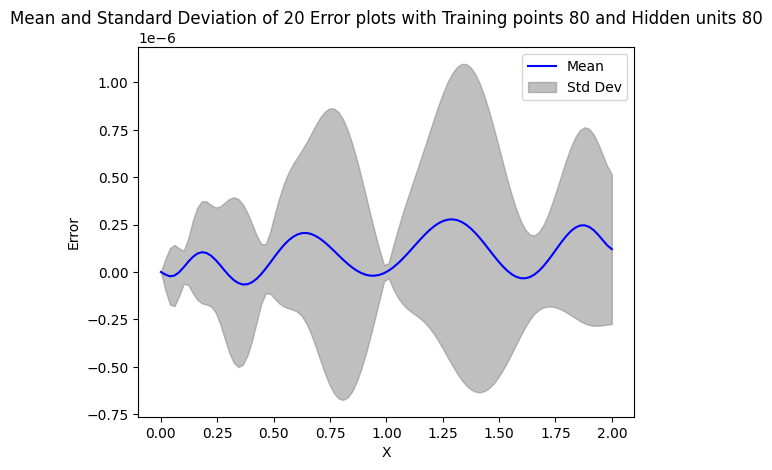

Mean time taken: 0.881904 seconds
Standard deviation: 0.469948 seconds


In [28]:
plot_error_variance(80, 80)
calc_time(100, 100, 20)

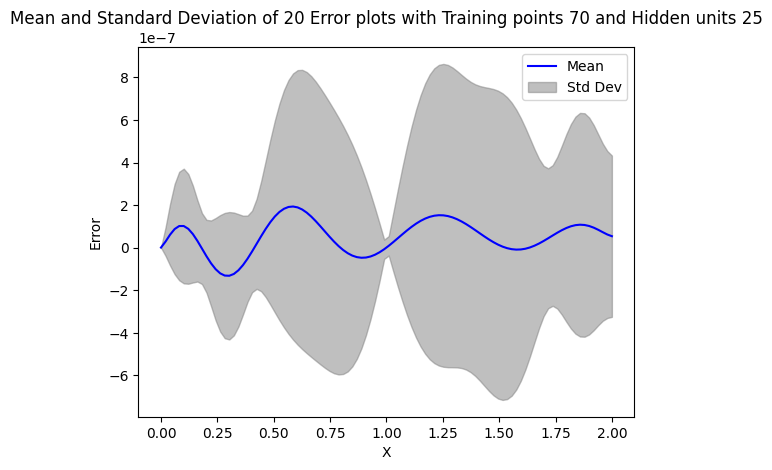

Mean time taken: 0.412660 seconds
Standard deviation: 0.227955 seconds


In [29]:
plot_error_variance(25, 70)
calc_time(100, 25, 70)

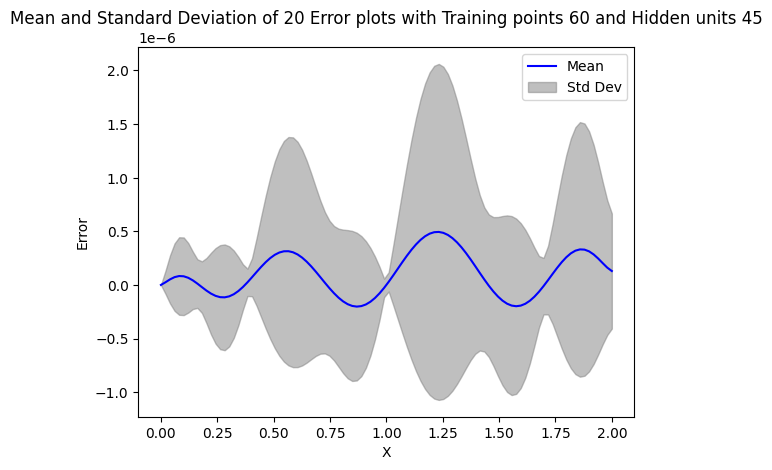

Mean time taken: 0.514710 seconds
Standard deviation: 0.273341 seconds


In [30]:
plot_error_variance(45, 60)
calc_time(100, 45,60)

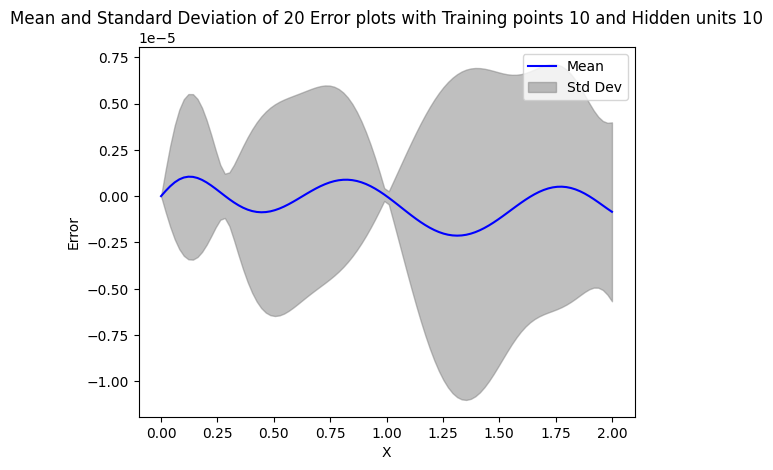

Mean time taken: 0.092788 seconds
Standard deviation: 0.078678 seconds


In [31]:
plot_error_variance(10,10)
calc_time(100, 10,10)